In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
loan = pd.read_csv('loan.csv')

/Users/ydeepa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 111)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

### 1. Checking for Missing Values

The dataset has 111 columns. We will ignore the columns that have all values as null as they will not be helpful for our analysis

In [6]:
# columns that have all values as null
for x in loan.columns:
    if loan[x].isnull().sum()>=39717:
        print(x)

mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit


In [7]:
columns_notnull = [x for x in loan.columns if loan[x].isnull().sum()<39717]
len(columns_notnull) # columns that do not have all values as null

57

Checking if there are columns that have only one value across all the rows.
These rows are also not useful as they dont indicate any significant information

In [8]:
[x for x in columns_notnull if len(loan[x].value_counts())<=1]

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [9]:
#Checking the unique values for each column that has only one unique value
for x in columns_notnull:
    if len(loan[x].value_counts())<=1:
        print('Unique Values in {} are {}'.format(x,loan[x].value_counts().index[0]))

Unique Values in pymnt_plan are n
Unique Values in initial_list_status are f
Unique Values in collections_12_mths_ex_med are 0.0
Unique Values in policy_code are 1
Unique Values in application_type are INDIVIDUAL
Unique Values in acc_now_delinq are 0
Unique Values in chargeoff_within_12_mths are 0.0
Unique Values in delinq_amnt are 0
Unique Values in tax_liens are 0.0


We can safely ignore these columns too for our analysis

In [10]:
# removing the columns that have same value
columns_notnull = [x for x in columns_notnull if len(loan[x].value_counts())>1]
len(columns_notnull)

48

In [11]:
for x in columns_notnull:
    if loan[x].isnull().sum()>0:
        print(x, loan[x].isnull().sum())

emp_title 2459
emp_length 1075
desc 12940
title 11
mths_since_last_delinq 25682
mths_since_last_record 36931
revol_util 50
last_pymnt_d 71
next_pymnt_d 38577
last_credit_pull_d 2
pub_rec_bankruptcies 697


Now that we have 48 columns, There are 7 columns that have null values. We will review the columns that have null values one by one

In [12]:
for x in columns_notnull:
    if loan[x].isnull().sum()>0:
        print(x, loan[x].isnull().sum())

emp_title 2459
emp_length 1075
desc 12940
title 11
mths_since_last_delinq 25682
mths_since_last_record 36931
revol_util 50
last_pymnt_d 71
next_pymnt_d 38577
last_credit_pull_d 2
pub_rec_bankruptcies 697


#### emp_title : "The job title supplied by the Borrower when applying for the loan."

1. emp_title has 2458 null values
2. Also in the data dictionary it is mentioned that "Employer Title replaces Employer Name for all loans listed after 9/23/2013" 

But there is no column indicating employer name, hence we will add all null values under a category 'Other'

In [13]:
#Checking if 'Other' value is already present
loan[loan.emp_title.str.lower()=='other'].emp_title

23591    Other
25498    other
Name: emp_title, dtype: object

In [14]:
#filling all null values as 'Other'
loan.emp_title.fillna('Other', inplace=True)
loan.emp_title.isnull().sum() # checking if all null values are filled

0

#### desc : "loan description provided by the borrower"

1. desc column has 12939 null values. 
2. We can fill all the null values with 'Not Provided'

In [15]:
loan.desc[3]

"  Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>"

In [16]:
loan.desc.fillna('Not Provided', inplace=True)
loan.desc.isnull().sum() # checking if all null values are filled

0

#### title : "The loan title provided by the borrower"

1. title has 10 null values
2. We can fill the null values as 'Not Provided'

In [17]:
loan.title[0:10]

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
4                                 Personal
5    My wedding loan I promise to pay back
6                                     Loan
7                          Car Downpayment
8     Expand Business & Buy Debt Portfolio
9              Building my credit history.
Name: title, dtype: object

In [18]:
loan.title.fillna('Not Provided', inplace=True)
loan.title.isnull().sum()

0

#### mths_since_last_delinq : "The number of months since the borrower's last delinquency."

1. mths_since_last_delinq has 25682 null values
2. As per the description of the field, this column indicates the number of months if borrower is delinquent

In [19]:
print ('Percentage of null values present = {}%. There are {} null values in this field out of {} values'
       .format(round(100* loan[loan.mths_since_last_delinq.isnull()].shape[0]/loan.shape[0],2), 
               loan[loan.mths_since_last_delinq.isnull()].shape[0], 
               loan.shape[0])
      )

Percentage of null values present = 64.66%. There are 25682 null values in this field out of 39717 values


Hence removing this column from our analysis

In [20]:
columns_notnull.remove('mths_since_last_delinq')

#### mths_since_last_record : "The number of months since the last public record."

1. mths_since_last_record has 36931 null values

Lets look at the percentage of null values

In [21]:
print ('Percentage of null values present = {}%. There are {} null values in this field out of {} values'
       .format(round(100* loan[loan.mths_since_last_record.isnull()].shape[0]/loan.shape[0],2), 
               loan[loan.mths_since_last_record.isnull()].shape[0], 
               loan.shape[0])
      )

Percentage of null values present = 92.99%. There are 36931 null values in this field out of 39717 values


Hence removing this column from our analysis

In [22]:
columns_notnull.remove('mths_since_last_record')

#### revol_util : "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."

1. There are 50 null values in revol_util column
2. This column indicates the revolving line utilization rate.
3. We can replace all the null values to 0% (min value) so that we can utilize the not-null values during our analysis

In [23]:
print ('Percentage of null values present = {}%. There are {} null values in this field out of {} values'
       .format(round(100* loan[loan.revol_util.isnull()].shape[0]/loan.shape[0],2), 
               loan[loan.revol_util.isnull()].shape[0], 
               loan.shape[0])
      )

Percentage of null values present = 0.13%. There are 50 null values in this field out of 39717 values


In [24]:
loan.revol_util.fillna('0',inplace=True)
loan.revol_util.isnull().sum() # checking if the null values are replaced

0

#### last_pymnt_d : "Last month payment was received"

1. This column has 71 null values

In [25]:
loan[loan.last_pymnt_d.isnull()>0].last_pymnt_amnt.value_counts()

0.0    71
Name: last_pymnt_amnt, dtype: int64

In [26]:
loan.last_pymnt_d.value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Jan-14     832
Aug-12     832
Aug-14     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
          ... 
Apr-15     136
Jun-10     116
May-10     116
Apr-10     114
Feb-10     112
Dec-09      93
Jan-10      73
Oct-09      62
Nov-09      59
Aug-09      49
Apr-09      43
Jul-09      43
May-09      41
Jun-09      40
Mar-09      38
Sep-09      37
Feb-09      33
Oct-08      28
Jan-09      21
Jul-08      14
Dec-08      14
May-08      14
Aug-08      13
Apr-08      12
Sep-08      12
Nov-08      10
Jun-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

2. The blank values in this column indicates that last month payment was not received as the last_pymnt_amnt is null.
3. We decide to keep the null values as is for our further analysis

#### next_pymnt_d : "Next scheduled payment date"

1. next_pymnt_d has 38577 null values
2. Next payment date will be scheduled for loans that are not yet paid fully. So let us look at the loan status to compare this field

In [27]:
loan[loan.next_pymnt_d.isnull()>0].loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

all null values in next_pymnt_d fall under 'Fully Paid' or 'Charged Off' under loan_status column. we have to keep this column to analyze next_pymnt_d on other loan statuses

#### last_credit_pull_d : "The most recent month LC pulled credit for this loan"

1. last_credit_pull_d has 2 null values
2. Since the null values are only 2, We will keep this column for our analysis

In [28]:
loan.last_credit_pull_d.describe()

count      39715
unique       106
top       May-16
freq       10308
Name: last_credit_pull_d, dtype: object

#### pub_rec_bankruptcies : "Number of public record bankruptcies"

1. There are 697 null values in this field

In [29]:
loan.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

Since the minimum is 0 for this column and maximum is 2, Let us fill the null values with 0 (no records)

In [30]:
loan.pub_rec_bankruptcies.fillna(0,inplace=True)

Now the data is cleaned for missing values and all the necessary columns names are captured in the list columns_notnull

In [31]:
print('We have the below {} columns after cleaning the dataset for missing values \n \n {}'
      .format(len(columns_notnull),columns_notnull))

We have the below 46 columns after cleaning the dataset for missing values 
 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


### 2. Delete columns that are unnecessary

#### id: A unique LC assigned ID for the loan listing.

In [32]:
print("Number of unique values in 'id' column = {}".format(len(loan.id.unique())))

Number of unique values in 'id' column = 39717


In the loan dataset, the column 'id' is the unique identifier for the LC and all the values are unique. 
Let us remove the column for our analysis

In [33]:
columns_notnull.remove('id')

#### member_id: A unique LC assigned Id for the borrower member.

In [34]:
print("Number of unique values in 'member_id' column = {}".format(len(loan.member_id.unique())))

Number of unique values in 'member_id' column = 39717


Similar to the 'id' column, member_id also has all unique values. So let us remove the column for our analysis

In [35]:
columns_notnull.remove('member_id')

In [36]:
print("We have the below {} columns after 'deleting the identified columns' \n \n {}".format(len(columns_notnull),columns_notnull))

We have the below 44 columns after 'deleting the identified columns' 
 
 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


In [37]:
# loan dataset is sliced to have only the above columns
loan = loan[columns_notnull]

In [38]:
loan.shape

(39717, 44)

### 3. Convert incorrect data types:

#### 3.1 There are date columns in the dataset that needs to be corrected to proper datetime format

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

#### issue_d

In [39]:
loan.issue_d.value_counts()[0:10]

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Name: issue_d, dtype: int64

The issue_d has only month and year and not the date of the month.

In [40]:
loan.last_pymnt_d.value_counts()[0:10]

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Jan-14     832
Aug-12     832
Aug-14     832
Name: last_pymnt_d, dtype: int64

In [41]:
loan.next_pymnt_d.value_counts()[0:10]

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [42]:
loan.last_credit_pull_d.value_counts()[0:10]

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
Jan-16      657
Dec-15      647
Mar-13      577
Mar-14      564
Dec-14      562
Name: last_credit_pull_d, dtype: int64

Similar to issue_d, all the above dates contain only month and Year. 

In [43]:
loan['issue_d'] = pd.to_datetime(loan.issue_d,format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan.last_pymnt_d,format='%b-%y')
loan['next_pymnt_d'] = pd.to_datetime(loan.next_pymnt_d,format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan.last_credit_pull_d,format='%b-%y')

In [44]:
#converted dates to correct format
loan[['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2011-12-01,2015-01-01,NaT,2016-05-01
1,2011-12-01,2013-04-01,NaT,2013-09-01
2,2011-12-01,2014-06-01,NaT,2016-05-01
3,2011-12-01,2015-01-01,NaT,2016-04-01
4,2011-12-01,2016-05-01,2016-06-01,2016-05-01


#### 3.2 Check and convert datatypes object to appropriate format

In [45]:
loan.select_dtypes(include=['object']).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'revol_util'],
      dtype='object')

##### term has 'months'

In [46]:
loan.term[0]

' 36 months'

In [47]:
# Removing 'months' from term
loan['term'] = loan.term.apply(lambda x: int(x.lstrip(' ').rstrip(' months')))
loan.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

##### int_rate has % and also needs to be converted to fraction

In [48]:
loan.int_rate[0]

'10.65%'

In [49]:
#removing % and converting to fraction, rounded to two decimal digits
loan['int_rate'] = loan.int_rate.apply(lambda x: round(float(x.rstrip('%'))/100,2))
loan.int_rate.value_counts()

0.11    5086
0.13    4757
0.10    3434
0.08    3386
0.07    3272
0.12    3240
0.14    2897
0.16    2681
0.15    2618
0.06    1532
0.17    1522
0.09    1520
0.18    1195
0.19     881
0.05     573
0.20     497
0.21     353
0.22     195
0.23      49
0.24      28
0.25       1
Name: int_rate, dtype: int64

##### grade values are categorical

In [50]:
loan.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

##### sub_grade is also categorical

In [51]:
loan.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

##### emp_title is also categorical

In [52]:
loan.emp_title.value_counts()

Other                                       2460
US Army                                      134
Bank of America                              109
IBM                                           66
AT&T                                          59
Kaiser Permanente                             56
USAF                                          54
Wells Fargo                                   54
UPS                                           53
US Air Force                                  52
Walmart                                       45
Lockheed Martin                               44
United States Air Force                       42
State of California                           42
U.S. Army                                     41
Verizon Wireless                              40
Self Employed                                 40
US ARMY                                       39
USPS                                          39
Walgreens                                     38
JP Morgan Chase     

##### emp_length has + sign and years prefixed

In [53]:
loan.emp_length[0]

'10+ years'

In [54]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [55]:
loan['emp_length'].isnull().sum()

1075

In [56]:
def fix_emp_length(x):
    try: 
        return int(x.replace('+','')
                                                         .replace(' years','')
                                                         .replace('< ','')
                                                         .replace(' year','')
                                                         .replace('n/a','0'))
    except AttributeError:
        return np.NaN

loan['emp_length'] = loan.emp_length.apply(lambda x: fix_emp_length(x))

In [57]:
loan.emp_length.value_counts()

10.0    8879
1.0     7823
2.0     4388
3.0     4095
4.0     3436
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [58]:
# loan['emp_length'] = loan.emp_length.apply(lambda x: int(x.replace('+','')
#                                                          .replace(' years','')
#                                                          .replace('< ','')
#                                                          .replace(' year','')
#                                                          .replace('n/a','0'))
#                                         )
# loan.emp_length.value_counts()

##### home_ownership is categorical

In [59]:
loan.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

##### verification_status  is categorical

In [60]:
loan.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

##### loan_status is categorical

In [61]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

##### url is categorical

In [62]:
loan.url.unique()

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175',
       ...,
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90395',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90376',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=87023'],
      dtype=object)

In [63]:
# Extracting information other than "https://lendingclub.com/browse/loanDetail.action?loan_id="
loan['url']= loan.url.apply(lambda x: int(x.replace('https://lendingclub.com/browse/loanDetail.action?loan_id=','')))
loan.url.unique()
loan.url.value_counts()

1052670    1
685540     1
253425     1
730606     1
867821     1
986603     1
444881     1
649578     1
878054     1
264792     1
521684     1
389504     1
1007073    1
1031645    1
822747     1
603127     1
564697     1
978391     1
773619     1
849396     1
601033     1
729368     1
732687     1
1058318    1
867853     1
865804     1
722442     1
663049     1
595464     1
732561     1
          ..
443826     1
403199     1
754469     1
1028899    1
506658     1
500513     1
868166     1
744222     1
553099     1
475195     1
465718     1
1014586    1
994128     1
488251     1
1037135    1
543704     1
705357     1
523082     1
387912     1
602710     1
891718     1
492357     1
741085     1
637762     1
582628     1
807743     1
1006398    1
1000253    1
871228     1
380631     1
Name: url, Length: 39717, dtype: int64

After removing the url common path from the 'url' column, the column only contains unique identifiers. 
Hence we can remove this column from our analysis as we have also excluded 'id' and 'member_id' columns

In [64]:
loan = loan.drop('url',axis=1)

##### desc is categorical

In [65]:
loan.desc.unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       'Not Provided', ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that

We will convert 'desc' column to two values - Provided, Not Provided. As the analysis can be done based on whether a description was provided during the loan application or not

In [66]:
# def func(x):
#     if x=='Not Provided':
#         return x
#     else return 'Provided'
loan['desc'] = loan.desc.apply(lambda x: x if (x=='Not Provided') else 'Provided')
loan.desc.value_counts()

Provided        26777
Not Provided    12940
Name: desc, dtype: int64

##### purpose is categorical

In [67]:
loan.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

##### title is categorical

In [68]:
loan.title.value_counts()

Debt Consolidation                          2184
Debt Consolidation Loan                     1729
Personal Loan                                659
Consolidation                                517
debt consolidation                           505
Credit Card Consolidation                    356
Home Improvement                             356
Debt consolidation                           334
Small Business Loan                          328
Credit Card Loan                             317
Personal                                     308
Consolidation Loan                           255
Home Improvement Loan                        247
personal loan                                234
personal                                     220
Loan                                         213
Wedding Loan                                 208
consolidation                                205
Car Loan                                     204
Other Loan                                   191
Credit Card Payoff  

##### zip_code is categorical

In [69]:
loan.zip_code.unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

In [70]:
#changing zip_code column to zip_code_first3 and removing xx 
loan['zip_code_first3']= loan.zip_code.apply(lambda x: x.rstrip('xx'))
loan.zip_code_first3.unique()

array(['860', '309', '606', '917', '972', '852', '280', '900', '958',
       '774', '853', '913', '245', '951', '641', '921', '067', '890',
       '770', '335', '799', '605', '103', '150', '326', '564', '141',
       '080', '330', '974', '934', '405', '946', '445', '850', '604',
       '292', '088', '180', '029', '700', '010', '441', '104', '061',
       '616', '947', '914', '765', '980', '017', '752', '787', '077',
       '540', '225', '440', '437', '559', '912', '325', '300', '923',
       '352', '013', '146', '074', '786', '937', '331', '115', '191',
       '114', '908', '902', '992', '750', '950', '329', '226', '614',
       '802', '672', '083', '100', '926', '931', '712', '060', '707',
       '342', '895', '430', '919', '996', '891', '935', '801', '928',
       '233', '927', '970', '211', '303', '070', '194', '263', '403',
       '301', '553', '993', '312', '432', '602', '216', '151', '971',
       '305', '334', '050', '129', '925', '483', '760', '961', '200',
       '085', '981',

##### addre_state is categorical

In [71]:
loan.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

##### earlier_cr_line is categorical

In [72]:
loan.earliest_cr_line.unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

earliest_cr_line needs to be converted to datetime format

In [73]:
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line,format='%b-%y')
loan.earliest_cr_line.dtype

dtype('<M8[ns]')

##### revol_util is categorical

In [74]:
loan.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [75]:
# percentage % needs to be removed and converted to fraction rounded upto 2 decimal places
loan['revol_util'] = loan.revol_util.apply(lambda x: float(x.replace('%',''))/100)

Now lets check if we have successfully treated all the object dtypes in the dataset

In [76]:
loan.select_dtypes(include=['object']).columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'zip_code_first3'],
      dtype='object')

Also to check if there are any other dtypes needs to be treated other than object

In [77]:
loan.select_dtypes(exclude=['object','datetime64','float','int']).columns

Index([], dtype='object')

### 4. Validate internal rules

#### 4.1 Date validation: issue_d is older than last_pymnt_d

In [78]:
loan[loan.issue_d > loan.last_pymnt_d]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,zip_code_first3


No values found where issue_d is earlier than last_pymnt_d

#### 4.2 Date validation: issue_d is older than next_pymnt_d

In [79]:
loan[loan.issue_d > loan.last_pymnt_d]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,zip_code_first3


No values found where issue_d is earlier than next_pymnt_d

#### 4.3 Date validation: last_pymnt_d is earlier than next_payment_d

In [80]:
loan[loan.last_pymnt_d > loan.next_pymnt_d]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,zip_code_first3


No values found where last_pymnt_d is earlier than next_payment_d

#### loan dataset is now treated/cleaned for further analysis

In [81]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null int64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  39717 non-null object
emp_length                 38642 non-null float64
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
desc                       39717 non-null object
purpose                    39717 non-null object
title                      39717 non-null object

## Analysis

In [82]:
loan.nunique().sort_values(ascending = True)

desc                           2
next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    10
delinq_2yrs                   11
purpose                       14
int_rate                      21
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
earliest_cr_line             526
zip_code_first3              823
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection

### unordered categorical variables

###### pub_rec_bankruptcies
###### emp_title
###### home_ownership
######  verification_status
######  purpose
######  title
######  zipcode
######  addr_state
######  revol_util


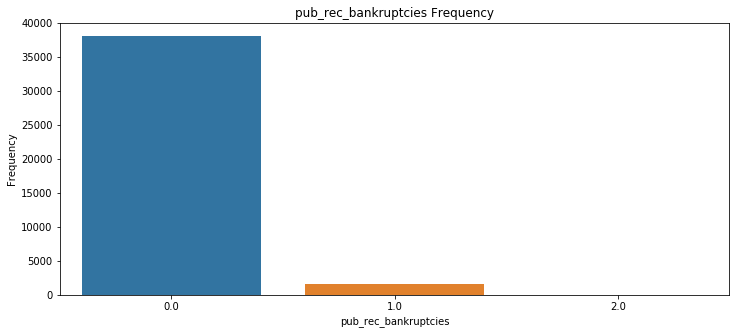

In [83]:
#pub_rec_bankruptcies                              2
pub_rec_bankruptcies_Frequency = loan.groupby('pub_rec_bankruptcies').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='pub_rec_bankruptcies', y='Frequency', data=pub_rec_bankruptcies_Frequency)
plt.title("pub_rec_bankruptcies Frequency")

plt.show()

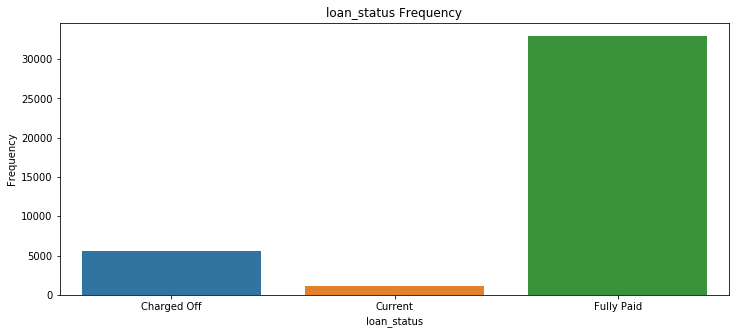

In [84]:
#loan_status                              2
loan_status_Frequency = loan.groupby('loan_status').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='loan_status', y='Frequency', data=loan_status_Frequency)
plt.title("loan_status Frequency")

plt.show()

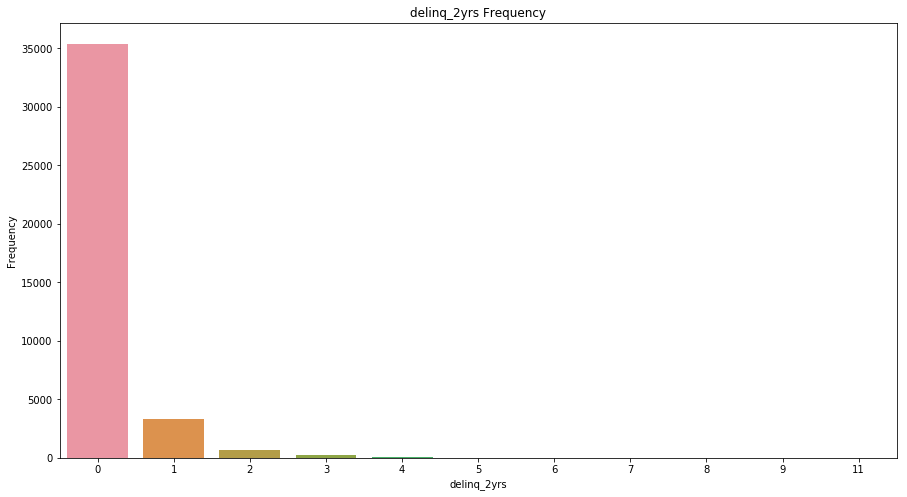

In [85]:
# delinq_2yrs                   11
delinq_2yrs_Frequency = loan.groupby('delinq_2yrs').size().reset_index(name='Frequency')
plt.figure(figsize=(15, 8))
sns.barplot(x='delinq_2yrs', y='Frequency', data=delinq_2yrs_Frequency)
plt.title("delinq_2yrs Frequency")

plt.show()

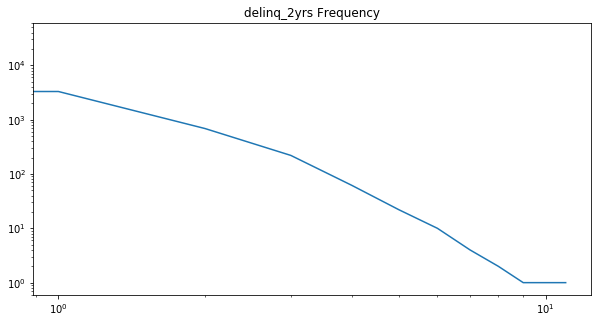

In [86]:
# delinq_2yrs  log log graph      
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.plot('delinq_2yrs','Frequency',data=delinq_2yrs_Frequency)
plt.title("delinq_2yrs Frequency")

plt.show()

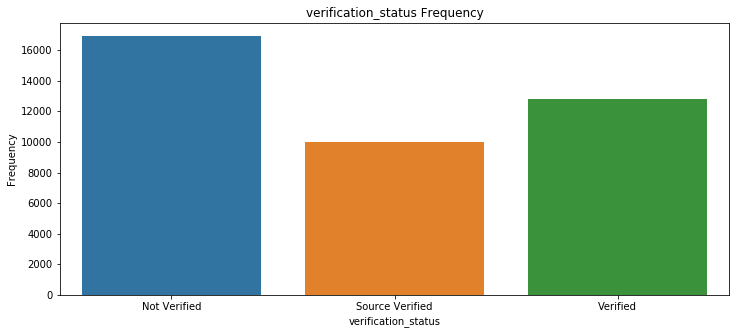

In [87]:
# verification_status            3
verification_status_Frequency = loan.groupby('verification_status').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='verification_status', y='Frequency', data=verification_status_Frequency)
plt.title("verification_status Frequency")

plt.show()

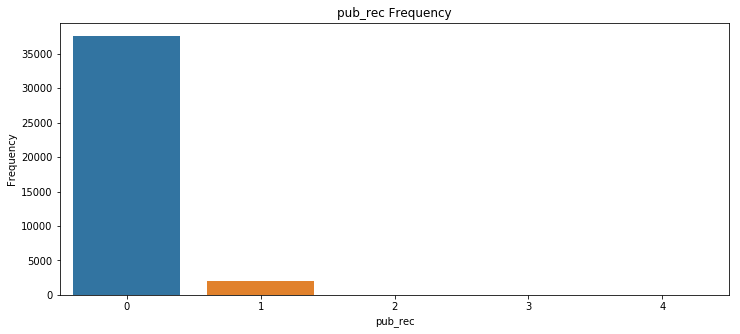

In [88]:
# pub_rec                        5
pub_rec_Frequency = loan.groupby('pub_rec').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='pub_rec', y='Frequency', data=pub_rec_Frequency)
plt.title("pub_rec Frequency")

plt.show()

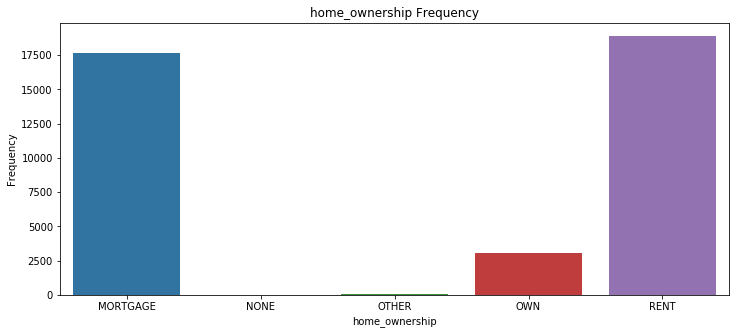

In [89]:
# home_ownership                 5
home_ownership_Frequency = loan.groupby('home_ownership').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='home_ownership', y='Frequency', data=home_ownership_Frequency)
plt.title("home_ownership Frequency")

plt.show()

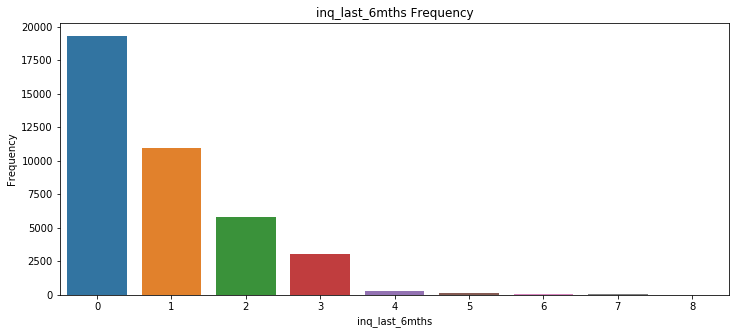

In [90]:
# inq_last_6mths                 9
inq_last_6mths_Frequency = loan.groupby('inq_last_6mths').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='inq_last_6mths', y='Frequency', data=inq_last_6mths_Frequency)
plt.title("inq_last_6mths Frequency")

plt.show()

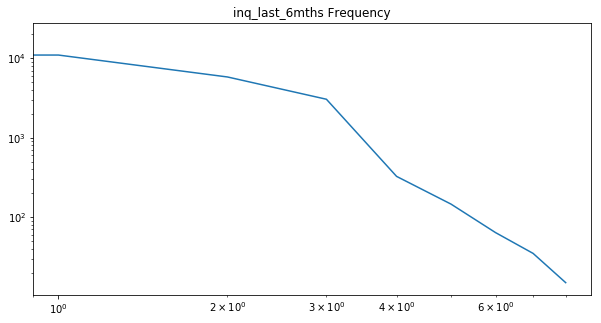

In [91]:
# inq_last_6mths  log log graph      
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.plot('inq_last_6mths','Frequency',data=inq_last_6mths_Frequency)
plt.title("inq_last_6mths Frequency")

plt.show()

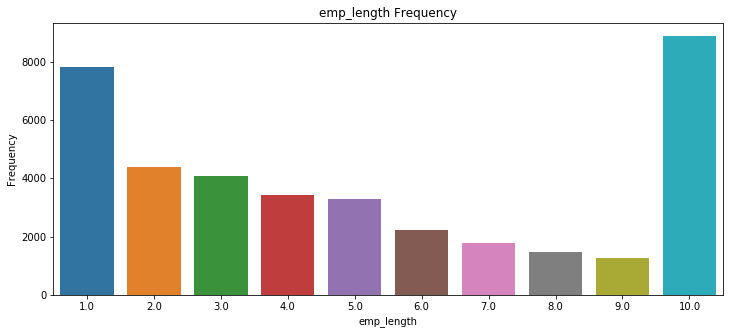

In [92]:
# emp_length                    10
emp_length_Frequency = loan.groupby('emp_length').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='emp_length', y='Frequency', data=emp_length_Frequency)
plt.title("emp_length Frequency")

plt.show()

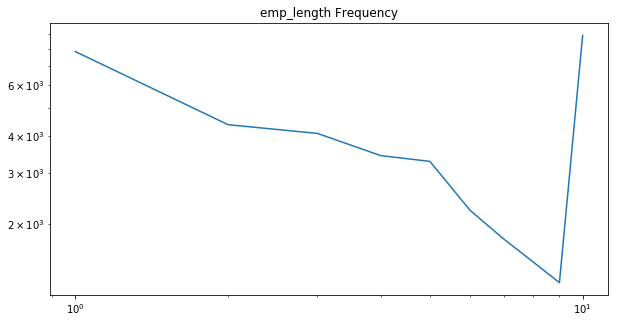

In [93]:
# emp_length  log log graph      
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.plot('emp_length','Frequency',data=emp_length_Frequency)
plt.title("emp_length Frequency")

plt.show()

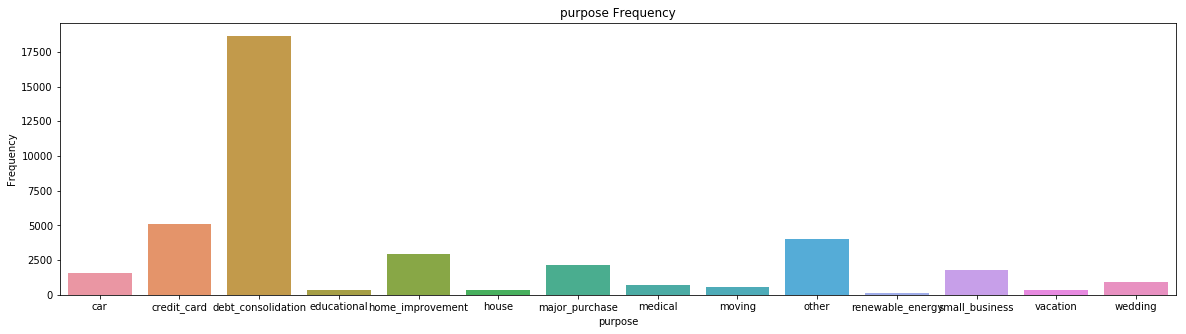

In [94]:
# purpose                       14
purpose_Frequency = loan.groupby('purpose').size().reset_index(name='Frequency')
plt.figure(figsize=(20, 5))
sns.barplot(x='purpose', y='Frequency', data=purpose_Frequency)
plt.title("purpose Frequency")

plt.show()

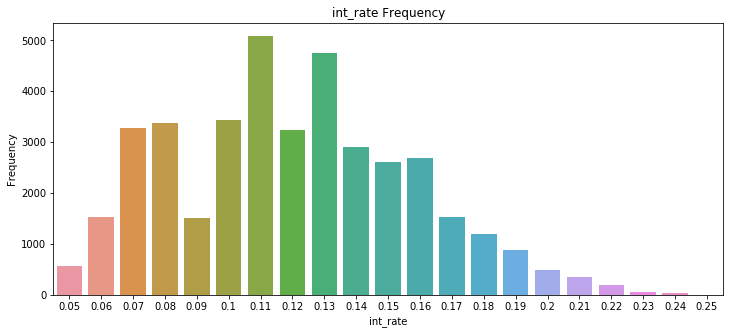

In [95]:
# int_rate                      21
int_rate_Frequency = loan.groupby('int_rate').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='int_rate', y='Frequency', data=int_rate_Frequency)
plt.title("int_rate Frequency")

plt.show()

### Inferences

1. Most records have 0 bankruptcy record
2. 1 out of 6 loan is charged off
3. delinq_2yrs and loan_status seems to have a pattern. Fully_paid category of loan vs 0 delinq_2yrs & charged_off category of loan vs 1 delinq_2yrs.  Record with past-due incidences of delinquency may fall towards charged_off category
4. Employment length of 1 and 10 have most loan requests and the graph and the graph slopes down from 1 till 9


### unordered categorical variables

1.grade

2.sub_grade

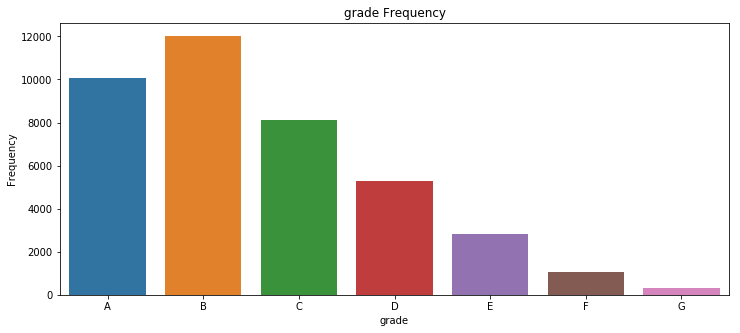

In [96]:
# grade            
grade_Frequency = loan.groupby('grade').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='grade', y='Frequency', data=grade_Frequency)
plt.title("grade Frequency")

plt.show()

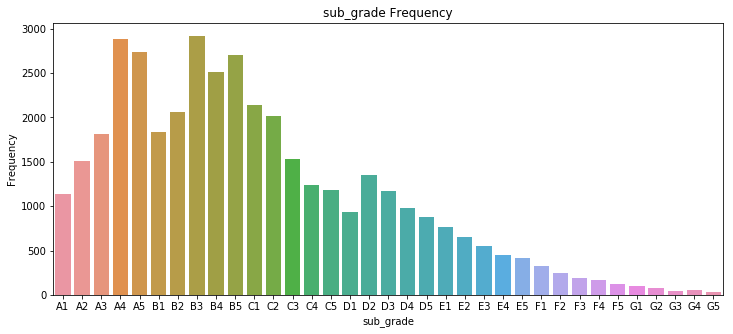

In [97]:
# sub_grade            
sub_grade_Frequency = loan.groupby('sub_grade').size().reset_index(name='Frequency')
plt.figure(figsize=(12, 5))
sns.barplot(x='sub_grade', y='Frequency', data=sub_grade_Frequency)
plt.title("sub_grade Frequency")

plt.show()

### Inferences
Most records fall under grade 'B' followed by 'A' and others

### Quantitative variables

In [98]:
loan.nunique().sort_values(ascending = True)

desc                           2
next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    10
delinq_2yrs                   11
purpose                       14
int_rate                      21
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
earliest_cr_line             526
zip_code_first3              823
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection

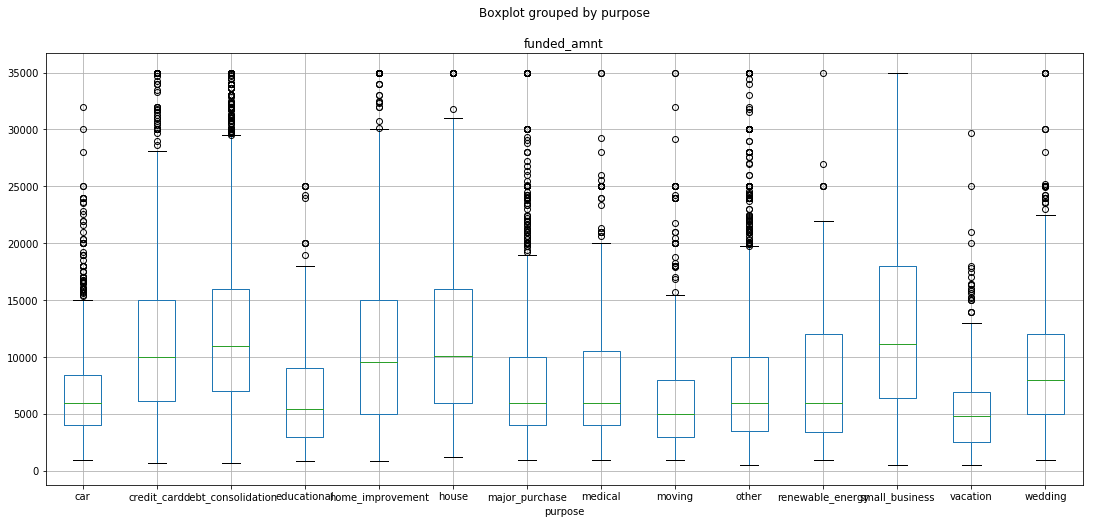

In [99]:
loan.boxplot(column='funded_amnt', by='purpose',figsize=(18,8))


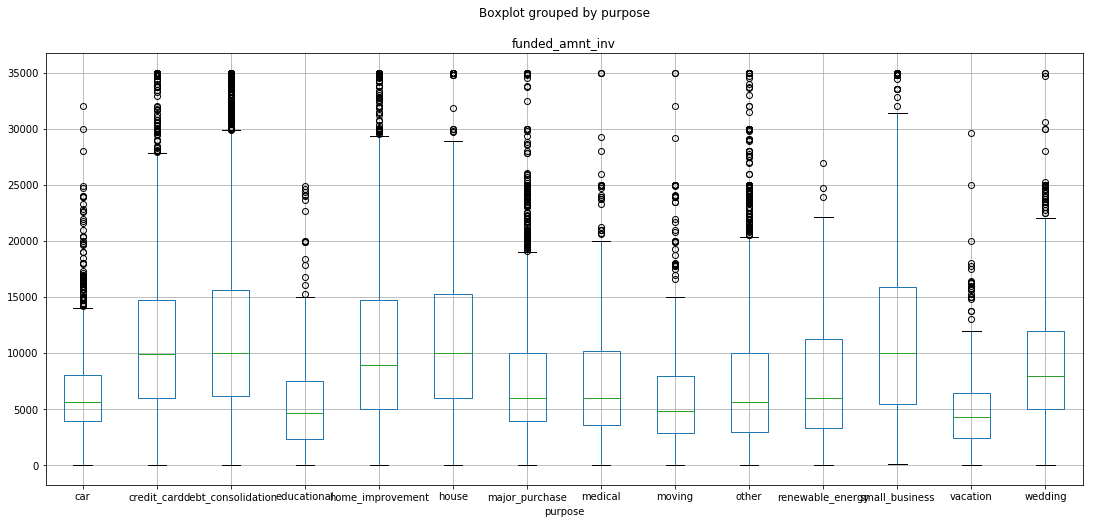

In [100]:
loan.boxplot(column='funded_amnt_inv', by='purpose',figsize=(18,8))

All below variables of 'purpose' column share almost same mean, median and percentile with respect to 'funded_amnt' and 'funded_amnt_inv'

`credit_card`
, `debt_consolidation`
, `home_improvement`
, `house`
, `smll_business` 

loan amount is spread in same manner for listed purposes.

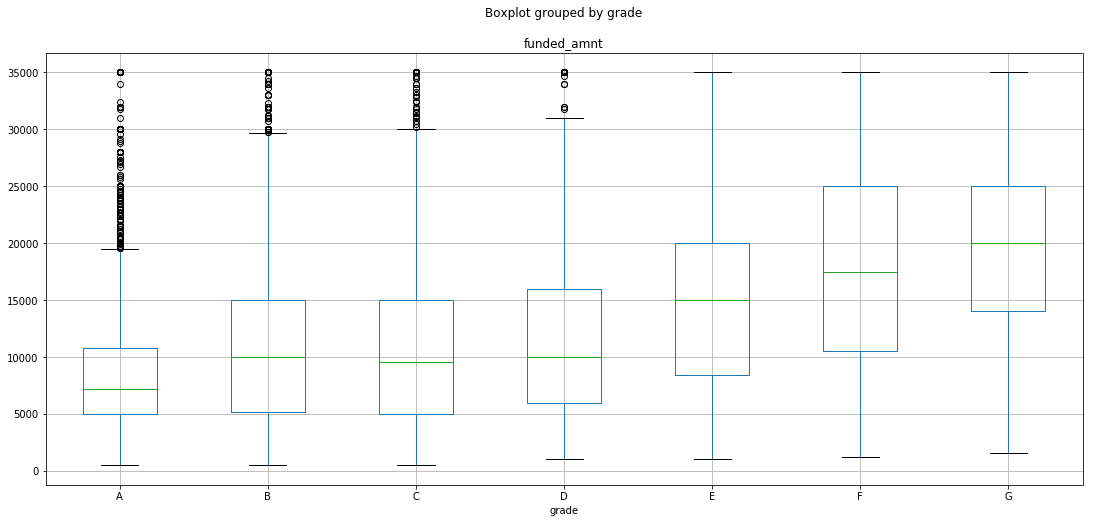

In [101]:
loan.boxplot(column='funded_amnt', by='grade',figsize=(18,8))

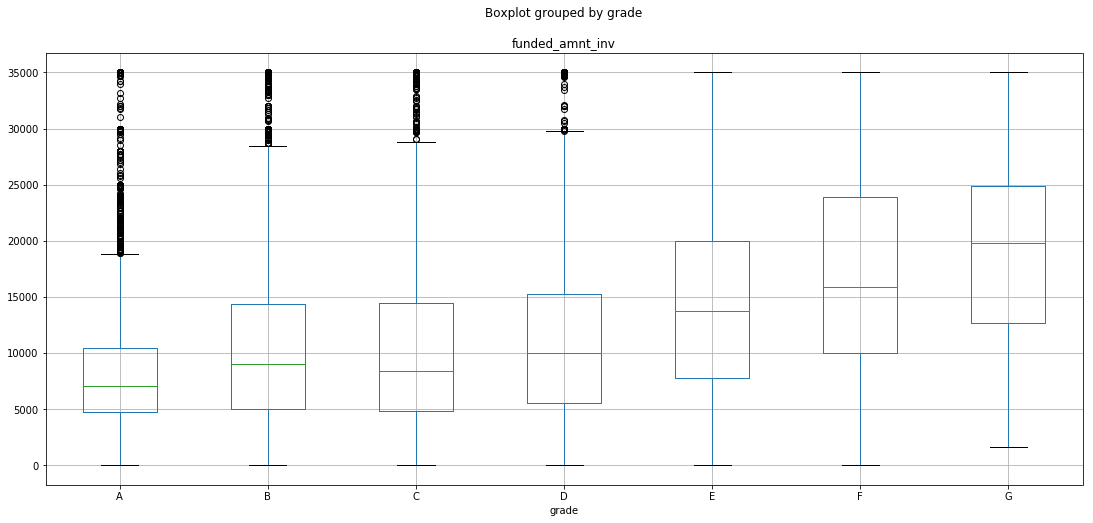

In [102]:
loan.boxplot(column='funded_amnt_inv', by='grade',figsize=(18,8))

`funded_amnt` and `funded_amnt_inv` gradually increases from A grade to F grade.

There are outliers in columns 'funded_amnt' and 'funded_amnt_inv' that has to be cleaned

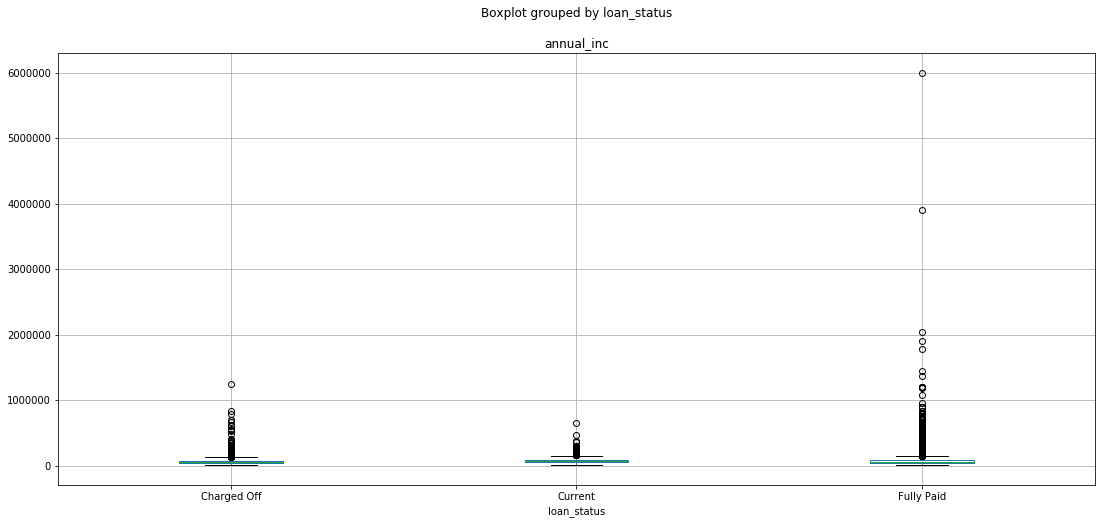

In [103]:
loan.boxplot(column='annual_inc', by='loan_status',figsize=(18,8))

Outliers in `annual_inc` to be removed

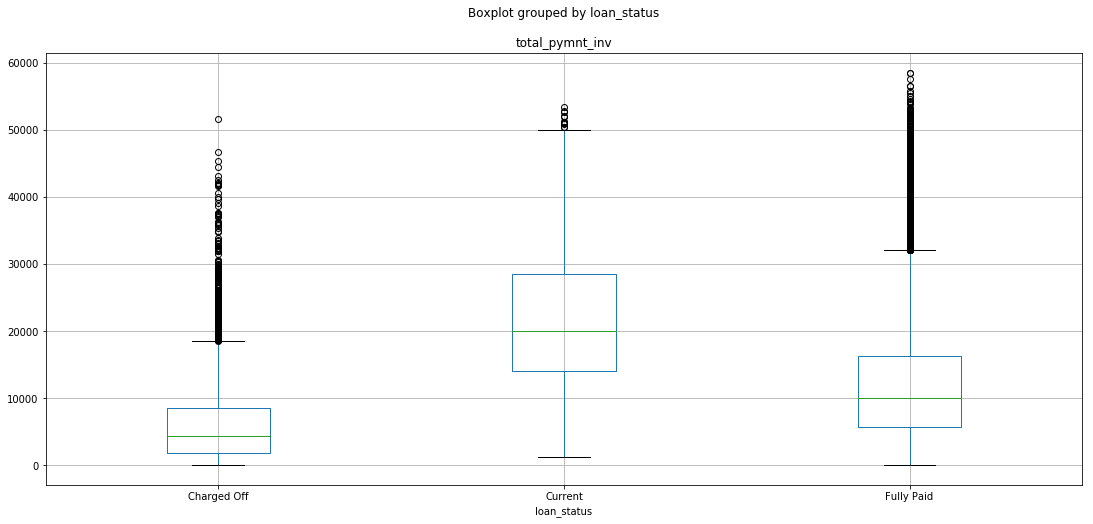

In [106]:

loan.boxplot(column='total_pymnt_inv', by='loan_status',figsize=(18,8))

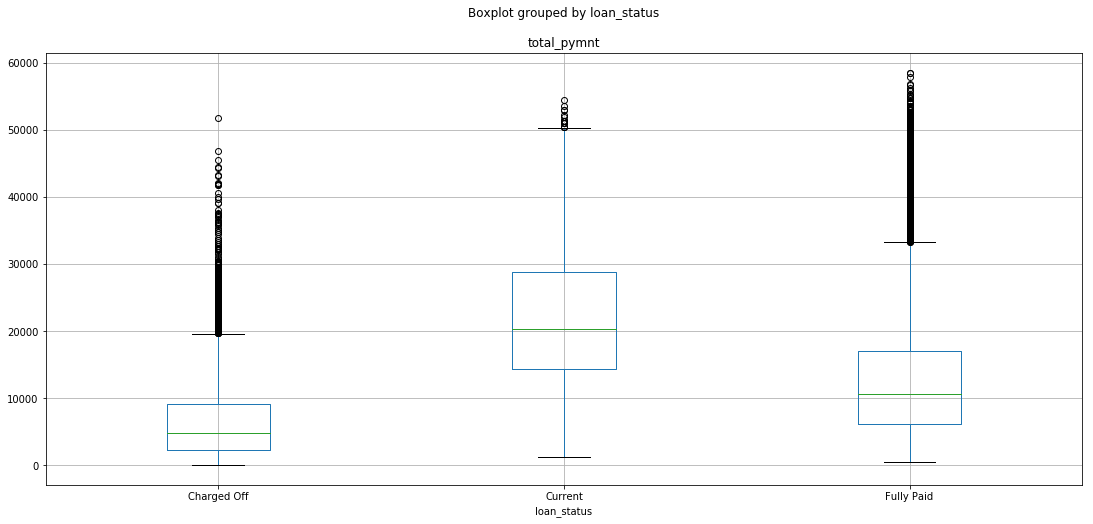

In [107]:
loan.boxplot(column='total_pymnt', by='loan_status',figsize=(18,8))

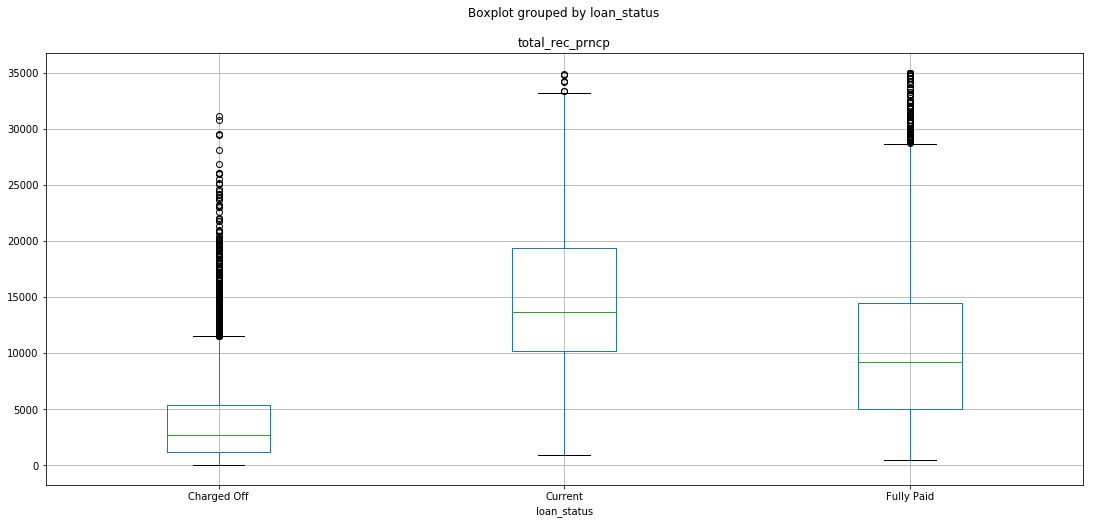

In [110]:
loan.boxplot(column='total_rec_prncp', by='loan_status',figsize=(18,8))

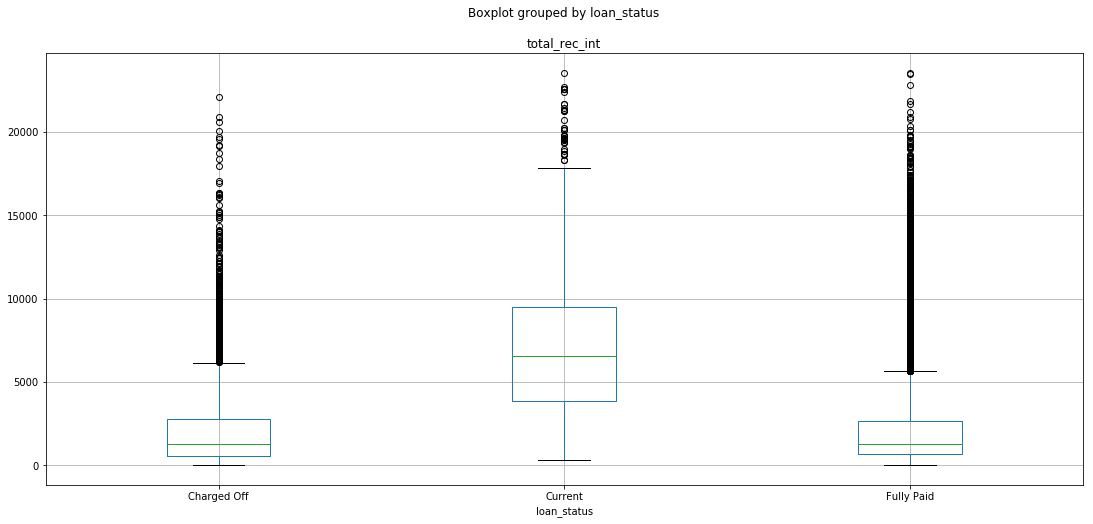

In [111]:
loan.boxplot(column='total_rec_int', by='loan_status',figsize=(18,8))

With above four plots on `total_pymnt` , `total_pymnt_inv` , `total_rec_int` and `total_rec_prncp` versus `loan_status`,

Loan with lesser repayment are charged Off and loan with higher repayment are either in progress or fully paid.